# Start The Program

# Import Library

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier, 
                              RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras models
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Flatten, 
                                     Dense, Dropout, GlobalAveragePooling1D, 
                                     BatchNormalization, Add, Bidirectional, LSTM, 
                                     Attention)
from tensorflow.keras.utils import to_categorical

# Dataset Load

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

Class 1 data sample

In [3]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


Class 0 data sample

In [4]:
data.tail()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
3881,LTKYALVAVIVLCLTVLGFTLLAGDSLCEFTVKERNIEFRAVLAYEPKK,5460.56,8.00,3105.0,5.5,43.01,133.27,0.747,55.0,1.00,0.15,1.1777,no evidence,0
3882,SNTFVAVEFSWLYAISLILPCETIRVAWAPKRAYHGTSEEKRRLAPADI,5578.43,7.91,13980.0,1.9,65.50,95.71,0.033,47.0,1.25,1.27,-0.0513,no evidence,0
3883,AVPKRRKSRSNTRHRRSQWKAAAPDLVPIVVDGERRLVPRPLVRYFQQG,5749.68,12.01,6990.0,4.4,92.14,75.51,-0.967,33.0,10.25,3.52,0.9008,no evidence,0
3884,IDHRCGREATPPGKLCNDGRCCSQWGWCGTTQAYCSGKCQSQCDCNRDL,5413.04,7.68,12990.0,20.0,23.34,27.96,-0.867,33.0,1.25,2.66,1.1166,no evidence,0
3885,HLRNHFGSKPFKCNKCNYACVNKSMLNSHMKSHTNVYQYRCADCTY...,5907.77,9.43,7700.0,3.5,33.52,33.20,-0.874,32.0,8.00,2.33,0.7596,no evidence,0


# Pre-processing

In [5]:
data.shape

(3886, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Sequence                    3886 non-null   object 
 1   molecular 
weight            3881 non-null   float64
 2   Theoretical Pi               3881 non-null   float64
 3   Extinction 
coefficient      2896 non-null   float64
 4   Half life
(hours)            3881 non-null   float64
 5   Instability
 index           3881 non-null   float64
 6   Aliphatic
 index             3881 non-null   float64
 7   GRAVY                        3879 non-null   object 
 8   Hydrophobic 
residue :       3771 non-null   float64
 9   Net charge:                  3771 non-null   float64
 10  Boman Index:
(Kcal/mol)      3770 non-null   float64
 11  Protective Antigenic
 Score  3867 non-null   float64
 12  Allergenicity                3884 non-null   object 
 13  property = 1      

In [7]:
data.isnull().sum()

 Sequence                         0
molecular \nweight                5
Theoretical Pi                    5
Extinction \ncoefficient        990
Half life\n(hours)                5
Instability\n index               5
Aliphatic\n index                 5
GRAVY                             7
Hydrophobic \nresidue :         115
Net charge:                     115
Boman Index:\n(Kcal/mol)        116
Protective Antigenic\n Score     19
Allergenicity                     2
property = 1                      0
dtype: int64

# For Machine Learning Algorithm

In [10]:
# Convert non-numeric values to NaN for numeric columns
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values for numerical columns with their mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for the categorical column 'Allergenicity' with the most frequent value
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

KeyError: "['molecular \\nweight', 'Extinction \\ncoefficient', 'Half life\\n(hours)', 'Instability\\n index', 'Aliphatic\\n index', 'Hydrophobic \\nresidue :', 'Boman Index:\\n(Kcal/mol)', 'Protective Antigenic\\n Score'] not in index"

# Data Distribution

property = 1
1    2082
0    1804
Name: count, dtype: int64


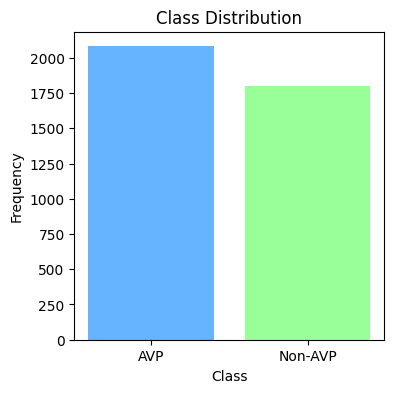

In [11]:
class_counts = data['property = 1'].value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution before SMOTE for tarin set

property = 1
1    1649
0    1459
Name: count, dtype: int64


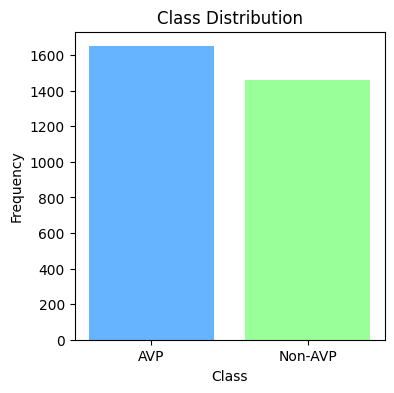

In [12]:
class_counts = y_train.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution After SMOTE for tarin set

property = 1
1    1649
0    1649
Name: count, dtype: int64


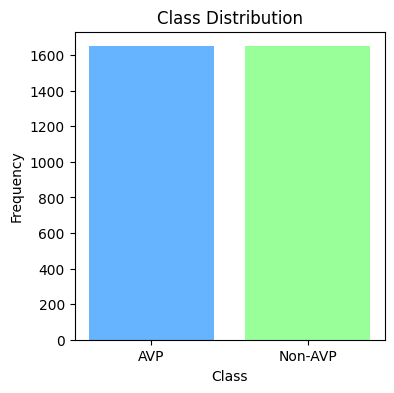

In [13]:
class_counts =  y_train_balanced.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Model Creation

In [15]:
# New ensemble classifiers
ensemble1 = VotingClassifier(estimators=[
    ('gb',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)             # Seed for reproducibility
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble2 = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42))

ensemble3 = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('brf', BalancedRandomForestClassifier(
        n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble4 = StackingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=BalancedRandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0))

# Machine Learning Algorithm

In [16]:
# Add this to your classifiers dictionary
classifiers = {
    'SVM': SVC(probability=True, C=1.0, gamma='scale', 
               shrinking=True, tol=1e-3, cache_size=200, verbose=False, max_iter=-1, 
               decision_function_shape='ovr', break_ties=False),
    
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                            min_samples_split=2, min_samples_leaf=1),
    
    'Extra Tree': ExtraTreesClassifier(n_estimators=100, max_depth=5), 
    
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, 
                                   min_samples_leaf=1, random_state=42),
    
    'Logistic Regression': LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                             C=1.0, fit_intercept=True, 
                                             intercept_scaling=1, 
                                             max_iter=100,
                                             verbose=0, warm_start=False),
    
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                       min_samples_split=2, min_samples_leaf=1),
    
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, leaf_size=30),
    
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                    solver='adam', alpha=0.0001, batch_size='auto', 
                                    learning_rate='constant', learning_rate_init=0.001, 
                                    power_t=0.5, max_iter=200, shuffle=True, 
                                    random_state=None, tol=0.0001, 
                                    verbose=False, warm_start=False, 
                                    momentum=0.9, nesterovs_momentum=True, 
                                    early_stopping=False, validation_fraction=0.1, 
                                    beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    
    'Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
    
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    
    'Balanced RF': BalancedRandomForestClassifier(
        n_estimators=100, random_state=42),
    
    'Proposed Ensemble 1': ensemble1,
    'Proposed Ensemble 2': ensemble2,
    'Proposed Ensemble 3': ensemble3,
    'Proposed Ensemble 4': ensemble4
}

# Result Analysis

Model: SVM
Accuracy: 0.7017994858611826
Confusion Matrix:
[[213 132]
 [100 333]]
F1 Score: 0.7416481069042317
Recall: 0.76905311778291
Precision: 0.7161290322580646
Mean Absolute Error: 0.2982005141388175
Root Mean Squared Error: 0.5460773884156142
ROC AUC Score: 0.6932222110653681
Specificity: 0.6173913043478261
Matthews Correlation Coefficient: 0.3915091294398472


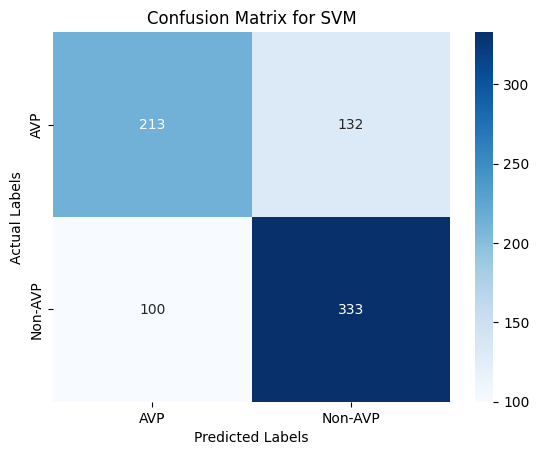

---------------------------------------
Model: Decision Tree
Accuracy: 0.6928020565552699
Confusion Matrix:
[[296  49]
 [190 243]]
F1 Score: 0.6703448275862068
Recall: 0.5612009237875288
Precision: 0.8321917808219178
Mean Absolute Error: 0.30719794344473006
Root Mean Squared Error: 0.5542544031802815
ROC AUC Score: 0.7095859691401412
Specificity: 0.8579710144927536
Matthews Correlation Coefficient: 0.4300670165877141


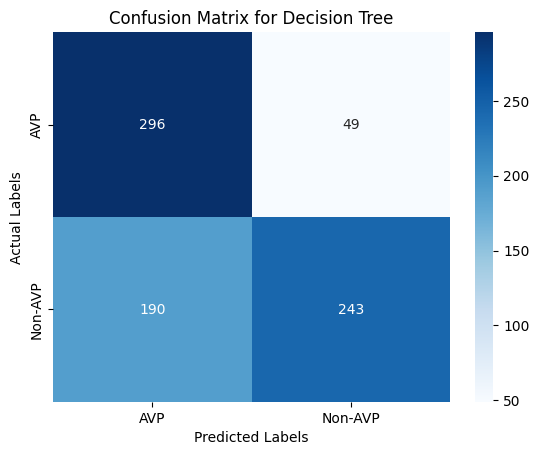

---------------------------------------
Model: Extra Tree
Accuracy: 0.6979434447300771
Confusion Matrix:
[[236 109]
 [126 307]]
F1 Score: 0.7232037691401648
Recall: 0.7090069284064665
Precision: 0.7379807692307693
Mean Absolute Error: 0.30205655526992287
Root Mean Squared Error: 0.5495967205778459
ROC AUC Score: 0.6965324497104796
Specificity: 0.6840579710144927
Matthews Correlation Coefficient: 0.3914865160927741


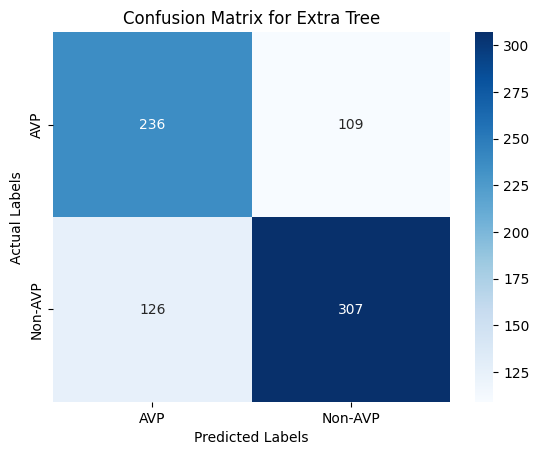

---------------------------------------
Model: Random Forest
Accuracy: 0.7493573264781491
Confusion Matrix:
[[236 109]
 [ 86 347]]
F1 Score: 0.7806524184476941
Recall: 0.8013856812933026
Precision: 0.7609649122807017
Mean Absolute Error: 0.2506426735218509
Root Mean Squared Error: 0.5006422610226297
ROC AUC Score: 0.7427218261538976
Specificity: 0.6840579710144927
Matthews Correlation Coefficient: 0.48964572275871376


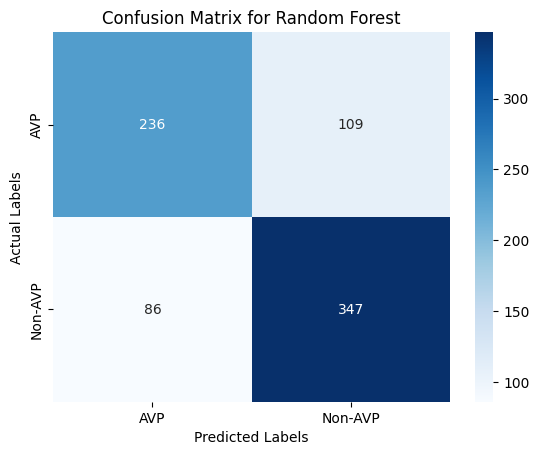

---------------------------------------
Model: Logistic Regression
Accuracy: 0.6915167095115681
Confusion Matrix:
[[231 114]
 [126 307]]
F1 Score: 0.7189695550351289
Recall: 0.7090069284064665
Precision: 0.7292161520190024
Mean Absolute Error: 0.30848329048843187
Root Mean Squared Error: 0.5554127208557902
ROC AUC Score: 0.6892860728988854
Specificity: 0.6695652173913044
Matthews Correlation Coefficient: 0.37742181296709243


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


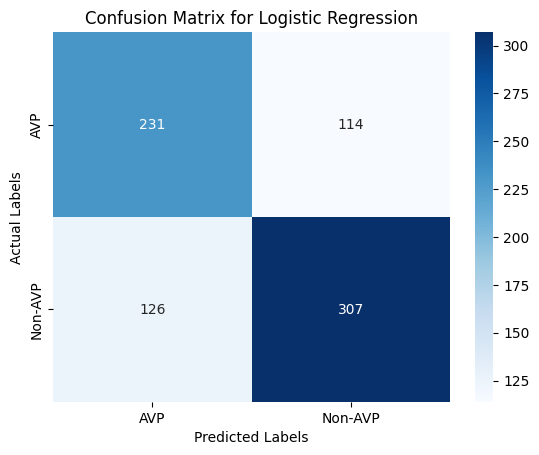

---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8586118251928021
Confusion Matrix:
[[296  49]
 [ 61 372]]
F1 Score: 0.8711943793911007
Recall: 0.859122401847575
Precision: 0.8836104513064132
Mean Absolute Error: 0.14138817480719795
Root Mean Squared Error: 0.37601618955464927
ROC AUC Score: 0.8585467081701643
Specificity: 0.8579710144927536
Matthews Correlation Coefficient: 0.7149144496396981


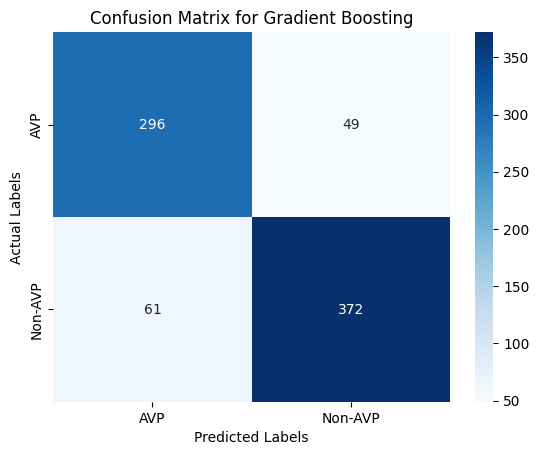

---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7532133676092545
Confusion Matrix:
[[265  80]
 [112 321]]
F1 Score: 0.7697841726618705
Recall: 0.7413394919168591
Precision: 0.800498753117207
Mean Absolute Error: 0.2467866323907455
Root Mean Squared Error: 0.49677623976066476
ROC AUC Score: 0.7547277169729224
Specificity: 0.7681159420289855
Matthews Correlation Coefficient: 0.5064269781514773


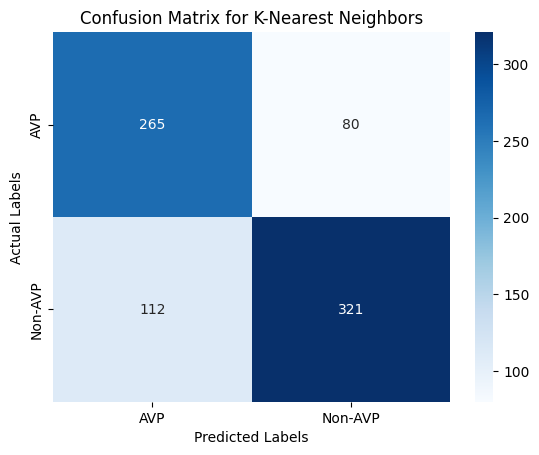

---------------------------------------
Model: Neural Network
Accuracy: 0.6928020565552699
Confusion Matrix:
[[244 101]
 [138 295]]
F1 Score: 0.7117008443908323
Recall: 0.6812933025404158
Precision: 0.7449494949494949
Mean Absolute Error: 0.30719794344473006
Root Mean Squared Error: 0.5542544031802815
ROC AUC Score: 0.694269839676005
Specificity: 0.7072463768115942
Matthews Correlation Coefficient: 0.3861087099979179


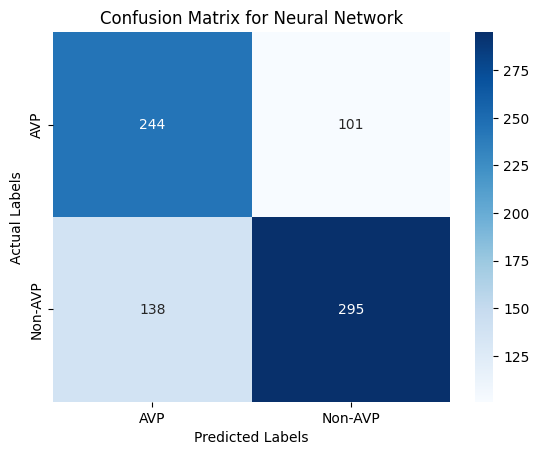

---------------------------------------
Model: Naive Bayes
Accuracy: 0.6876606683804627
Confusion Matrix:
[[182 163]
 [ 80 353]]
F1 Score: 0.7439409905163329
Recall: 0.815242494226328
Precision: 0.6841085271317829
Mean Absolute Error: 0.31233933161953725
Root Mean Squared Error: 0.5588732697307479
ROC AUC Score: 0.671389363055193
Specificity: 0.527536231884058
Matthews Correlation Coefficient: 0.36032289626174335


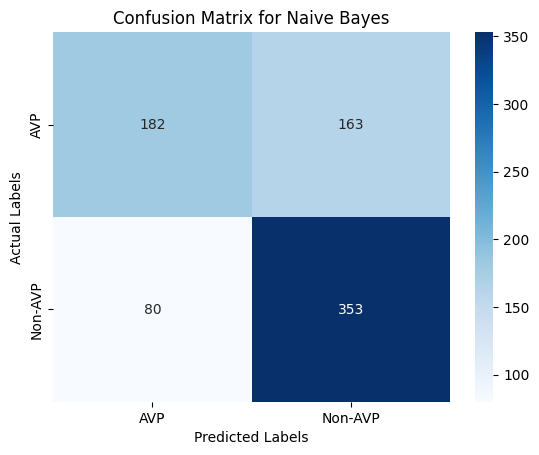

---------------------------------------
Model: AdaBoost
Accuracy: 0.7802056555269923
Confusion Matrix:
[[263  82]
 [ 89 344]]
F1 Score: 0.8009313154831199
Recall: 0.7944572748267898
Precision: 0.8075117370892019
Mean Absolute Error: 0.21979434447300772
Root Mean Squared Error: 0.46882229519617313
ROC AUC Score: 0.7783880577032499
Specificity: 0.7623188405797101
Matthews Correlation Coefficient: 0.5557224747499389


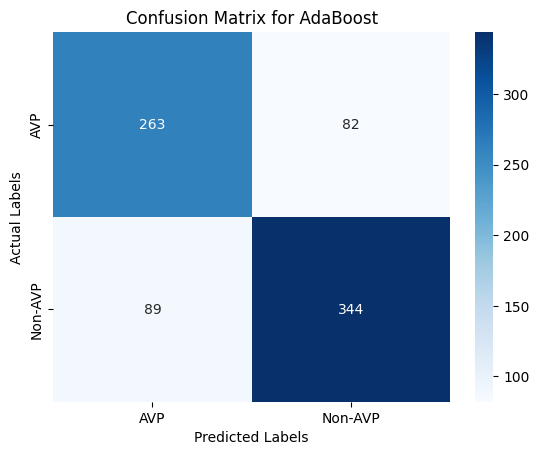

---------------------------------------
Model: XGBoost
Accuracy: 0.8444730077120822
Confusion Matrix:
[[284  61]
 [ 60 373]]
F1 Score: 0.8604382929642446
Recall: 0.8614318706697459
Precision: 0.8594470046082949
Mean Absolute Error: 0.15552699228791775
Root Mean Squared Error: 0.3943691066601411
ROC AUC Score: 0.8423101382334238
Specificity: 0.8231884057971014
Matthews Correlation Coefficient: 0.6848243078091591


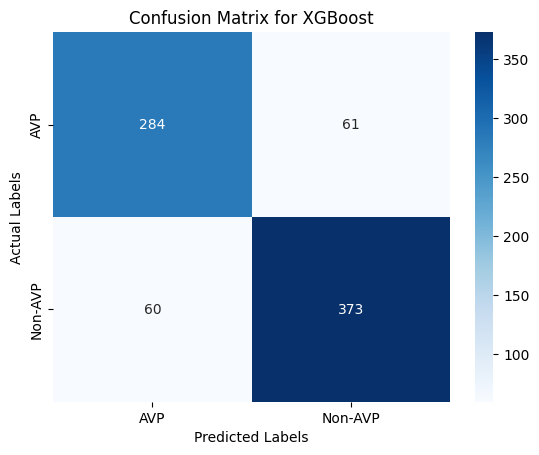

---------------------------------------
Model: Balanced RF


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8239074550128535
Confusion Matrix:
[[276  69]
 [ 68 365]]
F1 Score: 0.8419838523644751
Recall: 0.8429561200923787
Precision: 0.8410138248847926
Mean Absolute Error: 0.17609254498714652
Root Mean Squared Error: 0.41963382250141196
ROC AUC Score: 0.8214780600461894
Specificity: 0.8
Matthews Correlation Coefficient: 0.6431477346336644


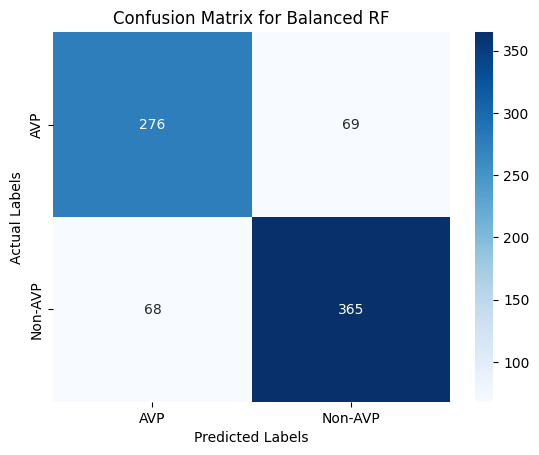

---------------------------------------
Model: Proposed Ensemble 1
Accuracy: 0.8637532133676092
Confusion Matrix:
[[293  52]
 [ 54 379]]
F1 Score: 0.8773148148148148
Recall: 0.8752886836027713
Precision: 0.8793503480278422
Mean Absolute Error: 0.13624678663239073
Root Mean Squared Error: 0.3691162237458423
ROC AUC Score: 0.8622820229608059
Specificity: 0.8492753623188406
Matthews Correlation Coefficient: 0.7241472788422428


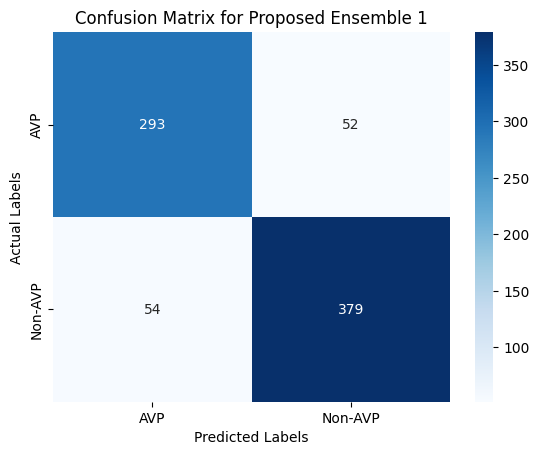

---------------------------------------
Model: Proposed Ensemble 2
Accuracy: 0.8431876606683805
Confusion Matrix:
[[293  52]
 [ 70 363]]
F1 Score: 0.856132075471698
Recall: 0.8383371824480369
Precision: 0.8746987951807229
Mean Absolute Error: 0.15681233933161953
Root Mean Squared Error: 0.39599537791698974
ROC AUC Score: 0.8438062723834387
Specificity: 0.8492753623188406
Matthews Correlation Coefficient: 0.6847308989927166


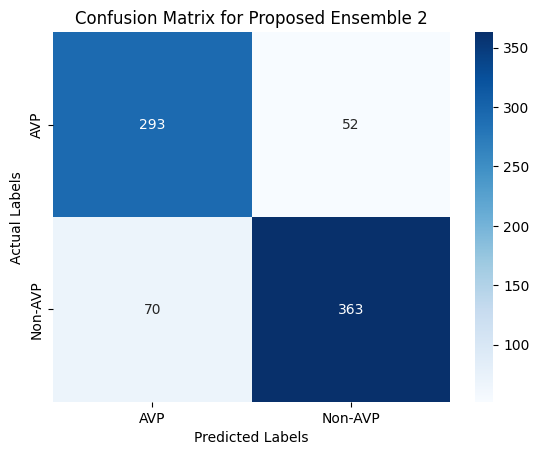

---------------------------------------
Model: Proposed Ensemble 3


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8547557840616966
Confusion Matrix:
[[286  59]
 [ 54 379]]
F1 Score: 0.870264064293915
Recall: 0.8752886836027713
Precision: 0.865296803652968
Mean Absolute Error: 0.14524421593830333
Root Mean Squared Error: 0.38110919162138207
ROC AUC Score: 0.8521370954245739
Specificity: 0.8289855072463768
Matthews Correlation Coefficient: 0.7053728755578654


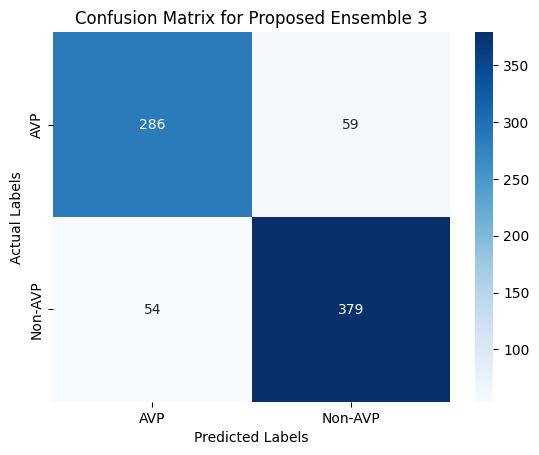

---------------------------------------
Model: Proposed Ensemble 4


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8483290488431876
Confusion Matrix:
[[283  62]
 [ 56 377]]
F1 Score: 0.8646788990825689
Recall: 0.8706697459584296
Precision: 0.8587699316628702
Mean Absolute Error: 0.15167095115681234
Root Mean Squared Error: 0.3894495489236216
ROC AUC Score: 0.8454798005154467
Specificity: 0.8202898550724638
Matthews Correlation Coefficient: 0.6922676579977959


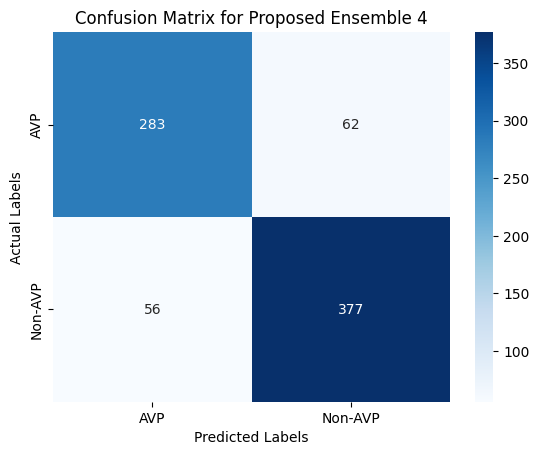

---------------------------------------


In [20]:
# Initialize lists for ROC data
roc_data = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    
    classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = classifier.predict(X_test_combined)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Calculate F1 score, precision, recall, etc.
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Calculate Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate Matthews Correlation Coefficient
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Specificity: {specificity}")
    print(f"Matthews Correlation Coefficient: {mcc}")

    # Create and save a heatmap of the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix for {name}")
    
    # Save the confusion matrix as an image file
    plt.savefig(f'Confusion_{name}.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()  # Close the plot to avoid display

    # Store ROC curve data
    y_prob = classifier.predict_proba(X_test_combined)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Ensure ROC curve starts at (0, 0)
    fpr = np.concatenate([[0], fpr])  # Add 0 at the start
    tpr = np.concatenate([[0], tpr])  # Add 0 at the start
    roc_data[name] = (fpr, tpr, roc_auc)

    print("---------------------------------------")

# Li et al. 2020 (DeepAVP)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5968 - loss: 1.0985 - val_accuracy: 0.6687 - val_loss: 0.6045
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6657 - loss: 0.6279 - val_accuracy: 0.6717 - val_loss: 0.6118
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6932 - loss: 0.6017 - val_accuracy: 0.6747 - val_loss: 0.6026
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6947 - loss: 0.5964 - val_accuracy: 0.6646 - val_loss: 0.6006
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7075 - loss: 0.5720 - val_accuracy: 0.6939 - val_loss: 0.5771
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7277 - loss: 0.5575 - val_accuracy: 0.6737 - val_loss: 0.5733
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7163 - loss: 0.5539 - val_accuracy: 0.6869 - val_loss: 0.5684
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7536 - loss: 0.5229 - val_accuracy: 0.

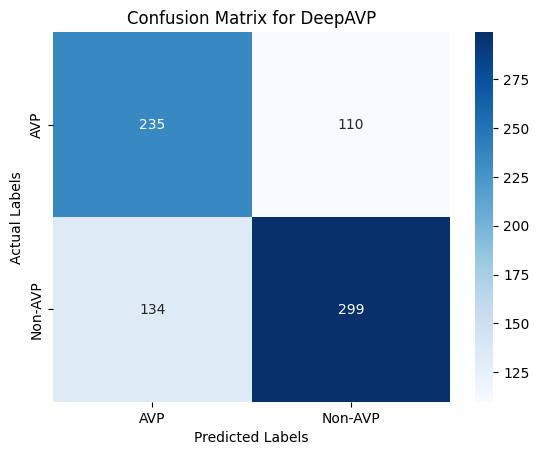

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Define target and features
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare sequence data
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape for LSTM input
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Reshape the sequence data for LSTM input
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)

# Create the model
def build_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM Channel
    lstm_out = LSTM(64)(inputs)
    lstm_out = Dropout(0.5)(lstm_out)
    
    # CNN Channel
    conv_out = Conv1D(32, kernel_size=3, activation='relu')(inputs)
    conv_out = Dropout(0.5)(conv_out)
    conv_out = Flatten()(conv_out)
    
    # Concatenate both channels
    combined = Concatenate()([lstm_out, conv_out])
    dense_out = Dense(64, activation='relu')(combined)
    output = Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(dense_out)
    
    # Model setup
    model = Model(inputs, output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
DeepAVP = build_hybrid_model((max_sequence_length, 1))

# Train the model
DeepAVP.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
            epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

DeepAVP_loss, DeepAVP_accuracy = DeepAVP.evaluate(X_test_sequences_reshaped, y_test_categorical)
print(f'DeepAVP Accuracy: {DeepAVP_accuracy:.4f}')

# Collect ROC data for the DeepAVP model
y_pred_probs = DeepAVP.predict(X_test_sequences_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for DeepAVP")
plt.savefig('Confusion_DeepAVP.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['DeepAVP'] = (fpr, tpr, roc_auc)

# Singh et al. 2020 (Deep-AVPiden)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5573 - loss: 1.6762 - val_accuracy: 0.6414 - val_loss: 0.6346
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6409 - loss: 0.6302 - val_accuracy: 0.6535 - val_loss: 0.6203
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6389 - loss: 0.6389 - val_accuracy: 0.6515 - val_loss: 0.6164
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6446 - loss: 0.6432 - val_accuracy: 0.6545 - val_loss: 0.6196
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6624 - loss: 0.6236 - val_accuracy: 0.6626 - val_loss: 0.6270
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6259 - loss: 0.6434 - val_accuracy: 0.6657 - val_loss: 0.6535
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6333 - loss: 0.6412 - val_accuracy: 0.6495 - val_loss: 0.6390
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6507 - loss: 0.6235 - val_accuracy: 0.

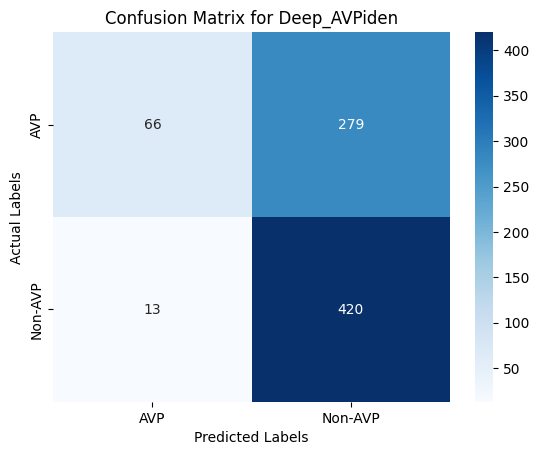

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Add, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust this line as needed

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape to fit input shape
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Split the balanced dataset back to sequence and other features
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part

# Reshape the sequence data for TCN input
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Define Temporal Convolutional Block
def tcn_block(inputs, filters, kernel_size, dilation_rate):
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(x)
    x = BatchNormalization()(x)
    return Add()([inputs, x])  # Residual connection

# Build Model
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = tcn_block(inputs, filters=32, kernel_size=3, dilation_rate=1)
    x = tcn_block(x, filters=32, kernel_size=3, dilation_rate=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)  # Single output for binary classification
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model
Deep_AVPiden = build_model((max_sequence_length, 1))

# Train the model
Deep_AVPiden.fit(X_train_balanced_reshaped, y_train_balanced, 
          epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
Deep_AVPiden_loss, Deep_AVPiden_accuracy = Deep_AVPiden.evaluate(X_test_sequences_reshaped, y_test)
print(f'Deep_AVPiden Accuracy: {Deep_AVPiden_accuracy:.4f}')

# Collect ROC data for the Deep_AVPiden model
y_pred_probs = Deep_AVPiden.predict(X_test_sequences_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Binarize predictions

# Calculate metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test, y_pred_probs)  # For binary classification
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPiden")
plt.savefig('Confusion_Deep_AVPiden.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Assuming binary classification
roc_data['Deep_AVPiden'] = (fpr, tpr, roc_auc)

# Sharma et al. 2021 (Deep_AVPpred)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6133 - loss: 0.7205 - val_accuracy: 0.6742 - val_loss: 0.5709
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6773 - loss: 0.6143 - val_accuracy: 0.6227 - val_loss: 0.6800
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6630 - loss: 0.6175 - val_accuracy: 0.6652 - val_loss: 0.6501
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7064 - loss: 0.5839 - val_accuracy: 0.6030 - val_loss: 0.6824
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7047 - loss: 0.5896 - val_accuracy: 0.6788 - val_loss: 0.6010
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7044 - loss: 0.5683 - val_accuracy: 0.5985 - val_loss: 0.8324
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7400 - loss: 0.5215 - val_accuracy: 0.6136 - val_loss: 0.6531
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7540 - loss: 0.5070 - val_accuracy: 0.

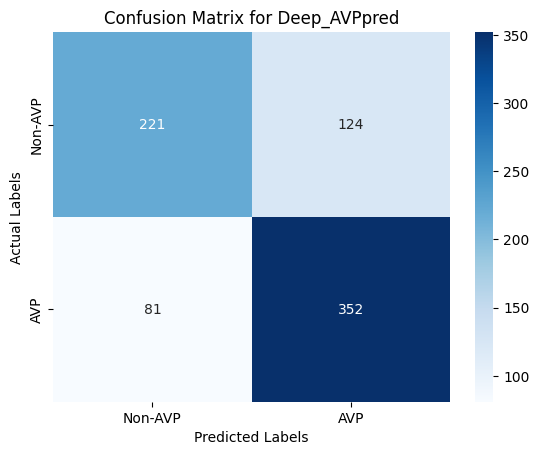

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, Input, BatchNormalization, Add
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust based on your dataset

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical if it's a classification problem
num_classes = len(np.unique(y))  # Adjust based on your target classes
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Reshape the balanced training data to include only the sequence part
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length]  # Select only the sequence part
X_test_sequences = X_test_combined[:, :max_sequence_length]  # Same for test

# Reshape to fit the model input shape
X_train_balanced_reshaped = X_train_sequences_balanced.reshape(X_train_sequences_balanced.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Define a ResNet-like architecture for 1D data
def resnet_block(input_tensor, filters):
    # First convolution block
    x = Conv1D(filters, kernel_size=3, padding='same', activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Adjust input tensor shape for residual connection
    if input_tensor.shape[-1] != filters:
        input_tensor = Conv1D(filters, kernel_size=1, padding='same')(input_tensor)  # 1x1 convolution to match shapes
        
    return Add()([input_tensor, x])  # Residual connection

# Build the model
inputs = Input(shape=(max_sequence_length, 1))
x = resnet_block(inputs, 64)
x = MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, 128)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)  # Use 'sigmoid' for binary classification

# Create and compile the model
Deep_AVPpred = Model(inputs=inputs, outputs=outputs)
Deep_AVPpred.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Deep_AVPpred.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
          epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
Deep_AVPpred_loss, Deep_AVPpred_accuracy = Deep_AVPpred.evaluate(X_test_reshaped, y_test_categorical)
print(f'Deep_AVPpred Accuracy: {Deep_AVPpred_accuracy:.4f}')

# Collect ROC data for the Deep_AVPpred model
y_pred_probs = Deep_AVPpred.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPpred")
plt.savefig('Confusion_Deep_AVPpred.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['Deep_AVPpred'] = (fpr, tpr, roc_auc)

# Akbar et al. 2022 (Ensemble_Learner)

XGB Accuracy: 0.8149100257069408
KNN Accuracy: 0.7532133676092545
ETC Accuracy: 0.6799485861182519
SVM Accuracy: 0.7017994858611826
ADA Accuracy: 0.718508997429306
Generation 0: Best fitness = 0.8020565552699229
Generation 1: Best fitness = 0.8020565552699229
Generation 2: Best fitness = 0.8020565552699229
Generation 3: Best fitness = 0.8149100257069408
Generation 4: Best fitness = 0.8149100257069408
Generation 5: Best fitness = 0.8149100257069408
Generation 6: Best fitness = 0.8149100257069408
Generation 7: Best fitness = 0.8149100257069408
Generation 8: Best fitness = 0.8149100257069408
Generation 9: Best fitness = 0.8149100257069408
Generation 10: Best fitness = 0.8149100257069408
Generation 11: Best fitness = 0.8149100257069408
Generation 12: Best fitness = 0.8149100257069408
Generation 13: Best fitness = 0.8149100257069408
Generation 14: Best fitness = 0.8149100257069408
Generation 15: Best fitness = 0.8149100257069408
Generation 16: Best fitness = 0.8149100257069408
Generation 17

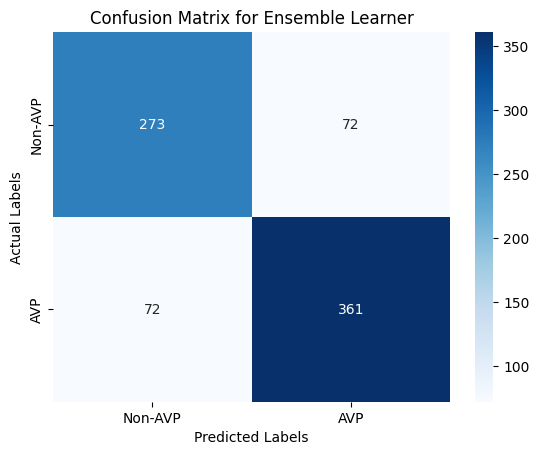

In [25]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier,
                              RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the padded sequences to a numpy array
X_train_sequences_flat = np.array(sequences_padded[:len(X_train)])
X_test_sequences_flat = np.array(sequences_padded[len(X_train):])

# Combine the flattened sequence data with numeric features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Initialize classifiers
classifiers = {
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "ETC": ExtraTreesClassifier(n_estimators=100, max_depth=5),
    "SVM": SVC(probability=True),
    "ADA": AdaBoostClassifier(n_estimators=100)
}

# Train classifiers and collect predictions
predictions = []
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)  # Use balanced data here
    y_pred = clf.predict(X_test_combined)  # Use combined data here
    predictions.append(y_pred)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Genetic Algorithm (simple ensemble)
# Initialize random population of classifier weights
population_size = 10
num_classifiers = len(classifiers)
num_generations = 50
mutation_rate = 0.1

def initialize_population(size, num_classifiers):
    return np.random.rand(size, num_classifiers)

def fitness(weights, predictions, y_true):
    weighted_preds = np.zeros_like(predictions[0], dtype=float)
    for i in range(num_classifiers):
        weighted_preds += weights[i] * predictions[i]
    final_preds = np.round(weighted_preds / np.sum(weights))  # Final ensemble decision
    return accuracy_score(y_true, final_preds)

def mutate(weights):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, len(weights))
        weights[idx] = np.random.rand()
    return weights

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, num_classifiers)
    child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    return child

# Genetic Algorithm Loop
population = initialize_population(population_size, num_classifiers)

for generation in range(num_generations):
    # Evaluate fitness of each individual
    fitness_scores = [fitness(ind, predictions, y_test) for ind in population]
    
    # Select the best individuals (elitism)
    sorted_idx = np.argsort(fitness_scores)[::-1]
    population = [population[i] for i in sorted_idx[:population_size // 2]]
    
    # Crossover and mutation
    for _ in range(population_size // 2):
        parent_indices = np.random.choice(len(population), size=2, replace=False)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
        child = mutate(crossover(parent1, parent2))
        population.append(child)
    
    # Best individual
    best_fitness = max(fitness_scores)
    print(f"Generation {generation}: Best fitness = {best_fitness}")

# Use the best weights for final predictions
best_weights = population[np.argmax(fitness_scores)]
weighted_preds = np.zeros_like(predictions[0], dtype=float)
for i in range(num_classifiers):
    weighted_preds += best_weights[i] * predictions[i]

final_preds = np.round(weighted_preds / np.sum(best_weights))
print(f"\n\nEnsemble Learner Accuracy: {accuracy_score(y_test, final_preds)}")

# Collect ROC data for the ensemble model
y_pred_probs = np.zeros((len(y_test), len(classifiers)))  # Collect probabilities for ROC
for i, clf in enumerate(classifiers.values()):
    y_pred_probs[:, i] = clf.predict_proba(X_test_combined)[:, 1]

roc_auc = roc_auc_score(y_test, np.mean(y_pred_probs, axis=1))  # Average probabilities for ROC AUC

# Calculate metrics
f1 = f1_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
mae = mean_absolute_error(y_test, final_preds)
rmse = mean_squared_error(y_test, final_preds, squared=False)
cm = confusion_matrix(y_test, final_preds)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Ensemble Learner")
plt.savefig('Confusion_Ensemble_Learner.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, np.mean(y_pred_probs, axis=1))  # Assuming binary classification

roc_data['Ensemble_Learner'] = (fpr, tpr, roc_auc)

# Yan et al. 2024 (AntiCVP-Deep)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5813 - loss: 0.6746 - val_accuracy: 0.5924 - val_loss: 0.7139
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6498 - loss: 0.6348 - val_accuracy: 0.6167 - val_loss: 0.6948
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6773 - loss: 0.6259 - val_accuracy: 0.6485 - val_loss: 0.6386
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6832 - loss: 0.6049 - val_accuracy: 0.6470 - val_loss: 0.6292
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6979 - loss: 0.5879 - val_accuracy: 0.6167 - val_loss: 0.6511
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6893 - loss: 0.6034 - val_accuracy: 0.6258 - val_loss: 0.6584
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6904 - loss: 0.5894 - val_accuracy: 0.6742 - val_loss: 0.6098
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6982 - loss: 0.6016 - val_accuracy: 0.

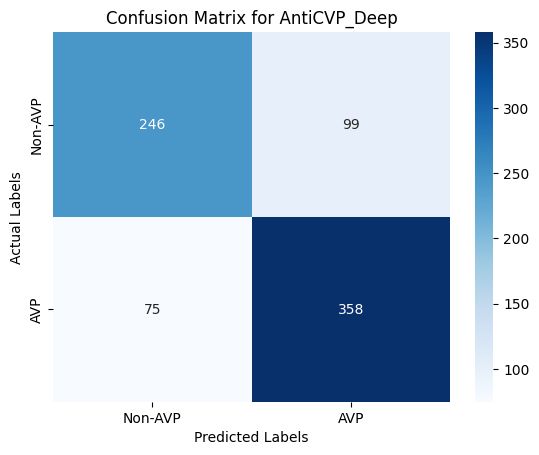

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, Attention, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Prepare sequence data
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}
sequences_encoded = [[amino_acid_to_index[amino_acid] for amino_acid in sequence] for sequence in data['Sequence']]
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')

# Prepare target variable
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sequences = sequences_padded[X_train.index]
X_test_sequences = sequences_padded[X_test.index]

# Reshape for LSTM
X_train_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine numerical features with sequence data for SMOTE
X_train_combined = np.hstack((X_train.values, X_train_sequences))
X_test_combined = np.hstack((X_test.values, X_test_sequences))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Final reshape for the LSTM
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)
X_test_sequences = X_test_combined[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)

# Define the model
def create_anticvp_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    attention = Attention()([x, x])
    x = GlobalAveragePooling1D()(attention)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
AntiCVP_Deep = create_anticvp_model((max_sequence_length, 1))

# Train the model
AntiCVP_Deep.fit(X_train_sequences_balanced, y_train_balanced_categorical, 
                 epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
AntiCVP_Deep_loss, AntiCVP_Deep_accuracy = AntiCVP_Deep.evaluate(X_test_sequences, y_test_categorical)
print(f'AntiCVP_Deep Accuracy: {AntiCVP_Deep_accuracy:.4f}')

# Predictions for evaluation metrics
y_pred_probs = AntiCVP_Deep.predict(X_test_sequences)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for AntiCVP_Deep")
plt.savefig('Confusion_AntiCVP_Deep.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification

roc_data['AntiCVP_Deep'] = (fpr, tpr, roc_auc)

# Roc Curve

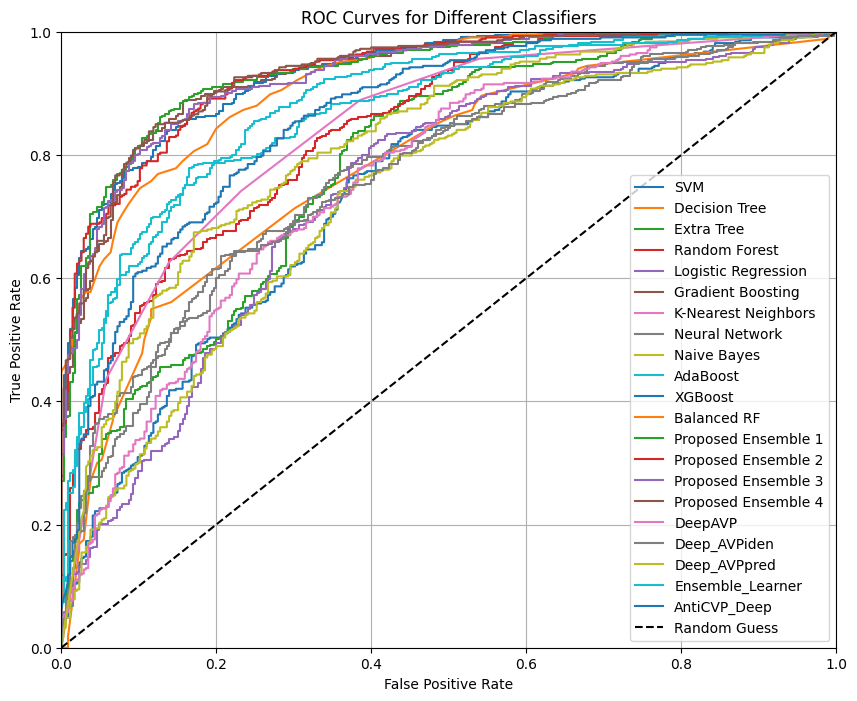

In [27]:
# Plot all ROC curves in a single plot
Rocsaved = plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set the axis limits to start from (0, 0)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid()

# Save the ROC curve figure
Rocsaved.savefig('ROC Curve.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# 